<a href="https://colab.research.google.com/github/alimaqsoodahmed/Machine-learning/blob/main/Data%20Analysis%20of%20Whatsapp%20chat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
maake a code for colab to analysisze that file and perform analysis on that so to cover overview of all feature of that whatsap group chat i want to know all about who is active most which day is most messages etc types .

Here is all the data you need:
"whatsappchat.txt"

## Data loading

### Subtask:
Load the WhatsApp chat data from the "whatsappchat.txt" file into a Pandas DataFrame.


**Reasoning**:
Load the whatsapp chat data into a pandas DataFrame, and inspect the first few rows.



In [1]:
import pandas as pd
import re

def extract_whatsapp_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = re.match(r'(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2} [APap][Mm]) - (.*?): (.*)', line)
            if match:
                timestamp_str = match.group(1)
                sender = match.group(2)
                message = match.group(3)
                data.append([timestamp_str, sender, message])
    df = pd.DataFrame(data, columns=['Timestamp', 'Sender', 'Message'])
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y, %I:%M:%S %p', errors='coerce')
    return df

df_whatsapp = extract_whatsapp_data('whatsappchat.txt')
display(df_whatsapp.head())
display(df_whatsapp.info())

,Timestamp,Sender,Message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  0 non-null      datetime64[ns]
 1   Sender     0 non-null      object        
 2   Message    0 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 132.0+ bytes


None

**Reasoning**:
The previous code failed to load the data correctly.  The DataFrame is empty.  I will revise the regular expression to handle variations in the timestamp format.  I will also add error handling to skip lines that do not match the expected format.



In [2]:
import pandas as pd
import re

def extract_whatsapp_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Handle variations in date format (DD/MM/YYYY, MM/DD/YYYY)
            match = re.match(r'(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2} (?:[AaPp][Mm])) - (.*?): (.*)', line)
            if match:
                timestamp_str = match.group(1)
                sender = match.group(2)
                message = match.group(3)
                try:
                    timestamp = pd.to_datetime(timestamp_str, format='%d/%m/%Y, %I:%M:%S %p', errors='raise')
                except ValueError:
                    try:
                        timestamp = pd.to_datetime(timestamp_str, format='%m/%d/%Y, %I:%M:%S %p', errors='raise')
                    except ValueError:
                        try:
                            timestamp = pd.to_datetime(timestamp_str, format='%m/%d/%y, %I:%M:%S %p', errors='raise')
                        except ValueError:
                            continue #skip lines that do not match any format
                data.append([timestamp, sender, message])
    df = pd.DataFrame(data, columns=['Timestamp', 'Sender', 'Message'])
    return df

df_whatsapp = extract_whatsapp_data('whatsappchat.txt')
display(df_whatsapp.head())
display(df_whatsapp.info())

,Timestamp,Sender,Message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  0 non-null      object
 1   Sender     0 non-null      object
 2   Message    0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


None

**Reasoning**:
The dataframe is still empty.  The regular expression might still be incorrect, or the file might not contain data in the expected format. I will try a different approach using a more flexible parsing method. I will use a loop to read line by line and try to extract the timestamp, sender and message.



In [3]:
import pandas as pd
import re

def extract_whatsapp_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue
            parts = line.split(" - ", 1)
            if len(parts) != 2:
              continue
            timestamp_sender = parts[0]
            message = parts[1]

            # Attempt to extract timestamp and sender
            timestamp_match = re.search(r"(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2} [APap][Mm])", timestamp_sender)
            if not timestamp_match:
              continue
            timestamp_str = timestamp_match.group(1)

            sender_message = message.split(":", 1)
            if len(sender_message) != 2:
                continue
            sender = sender_message[0]
            message = sender_message[1]


            try:
              timestamp = pd.to_datetime(timestamp_str, format='%d/%m/%Y, %I:%M:%S %p', errors='raise')
            except ValueError:
              try:
                timestamp = pd.to_datetime(timestamp_str, format='%m/%d/%Y, %I:%M:%S %p', errors='raise')
              except ValueError:
                try:
                  timestamp = pd.to_datetime(timestamp_str, format='%m/%d/%y, %I:%M:%S %p', errors='raise')
                except ValueError:
                    continue
            data.append([timestamp, sender, message])
    df = pd.DataFrame(data, columns=['Timestamp', 'Sender', 'Message'])
    return df

df_whatsapp = extract_whatsapp_data('whatsappchat.txt')
display(df_whatsapp.head())
display(df_whatsapp.info())

,Timestamp,Sender,Message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  0 non-null      object
 1   Sender     0 non-null      object
 2   Message    0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


None

## Data loading

### Subtask:
Load the WhatsApp chat data from the "whatsappchat.txt" file into a Pandas DataFrame.  Handle various date formats and potential inconsistencies in the file.


**Reasoning**:
The previous attempts to load the data failed.  I will try a more robust approach by improving the regular expression to handle more variations in the input file and adding more comprehensive error handling during date parsing. I will also explicitly handle empty lines and lines that don't conform to the expected format.



In [4]:
import pandas as pd
import re

def extract_whatsapp_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue  # Skip empty lines

            # Improved regex to handle variations in date format and optional AM/PM
            match = re.match(r"(?:\[)?(\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}:\d{2}\s(?:[APap][Mm])?)?(?:\])?\s*-\s(.*?):\s(.*)", line)
            if match:
                timestamp_str = match.group(1)
                sender = match.group(2)
                message = match.group(3)

                if timestamp_str:  # Only attempt to parse if a timestamp exists
                    try:
                        # Try different date formats
                        timestamp = pd.to_datetime(timestamp_str, format='%d/%m/%Y, %I:%M:%S %p', errors='raise')
                    except ValueError:
                        try:
                            timestamp = pd.to_datetime(timestamp_str, format='%m/%d/%Y, %I:%M:%S %p', errors='raise')
                        except ValueError:
                            try:
                                timestamp = pd.to_datetime(timestamp_str, format='%m/%d/%y, %I:%M:%S %p', errors='raise')
                            except ValueError:
                                try:
                                  timestamp = pd.to_datetime(timestamp_str, format='%d/%m/%y, %I:%M:%S %p', errors='raise')
                                except ValueError:
                                    print(f"Skipping line due to invalid timestamp format: {line.strip()}")
                                    continue
                    data.append([timestamp, sender, message])
                else:
                    print(f"Skipping line due to missing timestamp: {line.strip()}")

    df = pd.DataFrame(data, columns=['Timestamp', 'Sender', 'Message'])
    return df

df_whatsapp = extract_whatsapp_data('whatsappchat.txt')
display(df_whatsapp.head())
display(df_whatsapp.info())

Skipping line due to missing timestamp: - Experience: 0-1 year
Skipping line due to missing timestamp: - Programming Skills: Python, C/C++
Skipping line due to missing timestamp: - Stipend/salary: 40000
Skipping line due to missing timestamp: - Education: Fresh Graduates Only
Skipping line due to missing timestamp: - Minimum CGPA: 2.7
Skipping line due to missing timestamp: - Basic Salary: PKR 67,000
Skipping line due to missing timestamp: - Expected Increment: Up to PKR 90,000+ (based on quarterly performance; not officially confirmed yet)
Skipping line due to missing timestamp: - Gender: Both male and female candidates can apply


,Timestamp,Sender,Message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  0 non-null      object
 1   Sender     0 non-null      object
 2   Message    0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


None

## Data loading

### Subtask:
Load the WhatsApp chat data from the "whatsappchat.txt" file into a Pandas DataFrame.  Handle various date formats and potential inconsistencies in the file.  This is a retry of the previous data loading attempt.


**Reasoning**:
The previous attempts to load the data failed due to issues with the regular expression and date parsing. This code refines the regex to be more inclusive of various date formats and handles missing timestamps more gracefully. It also adds more comprehensive error handling to identify and skip problematic lines, providing more informative messages.



In [5]:
import pandas as pd
import re

def extract_whatsapp_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            if not line:
                continue

            # Improved regex to handle variations in date/time format and optional AM/PM
            match = re.match(r"(?:\[)?(\d{1,2}[./-]\d{1,2}[./-]\d{2,4},\s*\d{1,2}:\d{2}(?:\s*[APap][Mm])?)(?:\])?\s*-\s(.*?):\s(.*)", line)
            if not match:
                # Try a more general regex if the first one fails
                match = re.match(r"(?:\[)?(\d{1,2}[./-]\d{1,2}[./-]\d{2,4})(?:\])?\s*-\s(.*?):\s(.*)", line)
                if not match:
                    print(f"Skipping line due to unmatched format: {line}")
                    continue
                timestamp_str = None
            else:
                timestamp_str = match.group(1)

            sender = match.group(2)
            message = match.group(3)

            if timestamp_str:
                try:
                    # Attempt to parse the timestamp with various formats
                    for fmt in ['%d/%m/%Y, %I:%M %p', '%m/%d/%Y, %I:%M %p', '%d/%m/%y, %I:%M %p', '%m/%d/%y, %I:%M %p',
                                '%d/%m/%Y, %H:%M', '%m/%d/%Y, %H:%M', '%d/%m/%y, %H:%M', '%m/%d/%y, %H:%M',
                                '%d.%m.%Y, %H:%M', '%m.%d.%Y, %H:%M', '%d.%m.%y, %H:%M', '%m.%d.%y, %H:%M',
                                '%d-%m-%Y, %H:%M', '%m-%d-%Y, %H:%M', '%d-%m-%y, %H:%M', '%m-%d-%y, %H:%M',
                                '%d/%m/%Y, %I:%M:%S %p', '%m/%d/%Y, %I:%M:%S %p', '%d/%m/%y, %I:%M:%S %p', '%m/%d/%y, %I:%M:%S %p',
                                '%d.%m.%Y, %I:%M:%S %p', '%m.%d.%Y, %I:%M:%S %p', '%d.%m.%y, %I:%M:%S %p', '%m.%d.%y, %I:%M:%S %p',
                                '%d-%m-%Y, %I:%M:%S %p', '%m-%d-%Y, %I:%M:%S %p', '%d-%m-%y, %I:%M:%S %p', '%m-%d-%y, %I:%M:%S %p']:
                        timestamp = pd.to_datetime(timestamp_str, format=fmt, errors='raise')
                        break
                except ValueError:
                    print(f"Skipping line due to invalid timestamp format: {line}")
                    continue

                data.append([timestamp, sender, message])
            else:
                data.append([None, sender, message]) # append rows even if timestamp is missing

    df = pd.DataFrame(data, columns=['Timestamp', 'Sender', 'Message'])
    return df

df_whatsapp = extract_whatsapp_data('whatsappchat.txt')
display(df_whatsapp.head())
display(df_whatsapp.info())

Skipping line due to unmatched format: 10/28/22, 12:39 PM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
Skipping line due to unmatched format: 1/4/22, 9:36 AM - Anjum CUI created group "ECE ALUMNI"
Skipping line due to unmatched format: 10/28/22, 12:39 PM - You joined using this group's invite link
Skipping line due to unmatched format: 10/28/22, 12:46 PM - +92 349 0524649 joined using this group's invite link
Skipping line due to unmatched format: 10/28/22, 12:51 PM - +92 337 9729741 joined using this group's invite link
Skipping line due to unmatched format: 10/28/22, 12:59 PM - +92 311 7711435 joined using this group's invite link
Skipping line due to unmatched format: 10/28/22, 1:06 PM - Hsfa joined using this group's invite link
Skipping line due to unmatched format: 10/28/22, 1:47 PM - Anas Comsats joined using this group's invite link
Skipping line due to unmatched format: 10/28/22, 2:02 PM - +92 308 71177

,Timestamp,Sender,Message


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  0 non-null      object
 1   Sender     0 non-null      object
 2   Message    0 non-null      object
dtypes: object(3)
memory usage: 132.0+ bytes


None

## Data loading

### Subtask:
Load the WhatsApp chat data from the "whatsappchat.txt" file into a Pandas DataFrame.  Handle various date formats and potential inconsistencies in the file.  This is a retry of the previous data loading attempts, focusing on more robust parsing and error handling.


**Reasoning**:
The previous attempts failed due to inadequate regex and date parsing. This attempt will use dateutil.parser for more flexible date parsing and improve the regex to capture more variations while logging skipped lines for debugging.



In [6]:
import pandas as pd
import re
from dateutil import parser

def extract_whatsapp_data(file_path):
    data = []
    skipped_lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line_number, line in enumerate(file, 1):
            line = line.strip()
            if not line:
                continue

            # Improved regex: handles various date separators, optional AM/PM, and variations in timestamp placement.
            match = re.match(r"^(?:\[)?(\d{1,2}[./-]\d{1,2}[./-]\d{2,4},\s*\d{1,2}:\d{2}(?::\d{2})?\s*(?:[APap][Mm])?)(?:\])?\s*-\s(.*?):\s(.*)$", line)
            if not match:
                skipped_lines.append((line_number, line, "Unmatched format"))
                continue

            timestamp_str = match.group(1)
            sender = match.group(2)
            message = match.group(3)

            try:
                timestamp = parser.parse(timestamp_str)
            except ValueError:
                skipped_lines.append((line_number, line, "Invalid timestamp format"))
                timestamp = pd.NaT

            data.append([timestamp, sender, message])

    df = pd.DataFrame(data, columns=['Timestamp', 'Sender', 'Message'])

    # Log skipped lines for debugging
    if skipped_lines:
        print("Skipped lines:")
        for line_number, line, reason in skipped_lines:
            print(f"Line {line_number}: {line} (Reason: {reason})")

    return df

df_whatsapp = extract_whatsapp_data('whatsappchat.txt')
display(df_whatsapp.head())
display(df_whatsapp.info())

Skipped lines:
Line 1: 10/28/22, 12:39 PM - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more. (Reason: Unmatched format)
Line 2: 1/4/22, 9:36 AM - Anjum CUI created group "ECE ALUMNI" (Reason: Unmatched format)
Line 3: 10/28/22, 12:39 PM - You joined using this group's invite link (Reason: Unmatched format)
Line 4: 10/28/22, 12:46 PM - +92 349 0524649 joined using this group's invite link (Reason: Unmatched format)
Line 5: 10/28/22, 12:51 PM - +92 337 9729741 joined using this group's invite link (Reason: Unmatched format)
Line 6: 10/28/22, 12:59 PM - +92 311 7711435 joined using this group's invite link (Reason: Unmatched format)
Line 7: 10/28/22, 1:06 PM - Hsfa joined using this group's invite link (Reason: Unmatched format)
Line 8: 10/28/22, 1:47 PM - Anas Comsats joined using this group's invite link (Reason: Unmatched format)
Line 9: 10/28/22, 2:02 PM - +92 308 7117751 joined using this group's invite link (Reason

,Timestamp,Sender,Message
0,2022-11-01 10:04:00,Anjum CUI,https://scholarshipcorners.com/intelligence-bu...
1,2022-11-01 11:11:00,Anjum CUI,<Media omitted>
2,2022-11-02 20:01:00,Anjum CUI,<Media omitted>
3,2022-11-07 23:38:00,+92 336 5540669,<Media omitted>
4,2022-11-07 23:40:00,+92 336 5450444,Allah grant him quick health


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  1338 non-null   datetime64[ns]
 1   Sender     1338 non-null   object        
 2   Message    1338 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 31.5+ KB


None

## Data cleaning

### Subtask:
Clean the WhatsApp chat data in the `df_whatsapp` DataFrame.


**Reasoning**:
Clean the WhatsApp chat data by handling missing values, ensuring data type consistency, removing irrelevant rows, and deduplicating the DataFrame.



In [7]:
# Handle Missing Values (already handled during data loading)
# Data Type Consistency (already handled during data loading)

# Remove Irrelevant Rows
df_whatsapp = df_whatsapp[~df_whatsapp['Message'].str.contains('<Media omitted>', na=False)]
df_whatsapp = df_whatsapp[~df_whatsapp['Message'].str.contains('security code', na=False, case=False)]
df_whatsapp = df_whatsapp[~df_whatsapp['Message'].str.contains('added', na=False, case=False)]
df_whatsapp = df_whatsapp[~df_whatsapp['Message'].str.contains('removed', na=False, case=False)]
df_whatsapp = df_whatsapp[~df_whatsapp['Message'].str.contains('left', na=False, case=False)]
df_whatsapp = df_whatsapp[df_whatsapp['Message'].str.len() > 0]
df_whatsapp = df_whatsapp.dropna(subset=['Timestamp'])

# Deduplication
num_duplicates = df_whatsapp.duplicated().sum()
df_whatsapp = df_whatsapp.drop_duplicates()
print(f"Removed {num_duplicates} duplicate rows.")

display(df_whatsapp.head())
display(df_whatsapp.info())

Removed 7 duplicate rows.


,Timestamp,Sender,Message
0,2022-11-01 10:04:00,Anjum CUI,https://scholarshipcorners.com/intelligence-bu...
4,2022-11-07 23:40:00,+92 336 5450444,Allah grant him quick health
5,2022-11-07 23:40:00,+92 302 8142669,Allah ke zat rehm farmaei or sehat da bhai ko ...
6,2022-11-07 23:41:00,Hasnat Shabbir,Allah seht ata frmyen Ameen
7,2022-11-07 23:41:00,+92 336 8512783,May Allau subhan grant him a speedy recovery a...


<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  936 non-null    datetime64[ns]
 1   Sender     936 non-null    object        
 2   Message    936 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 29.2+ KB


None

## Data wrangling

### Subtask:
Create new features from the existing data in the `df_whatsapp` DataFrame.  These new features should facilitate further analysis and visualization.


**Reasoning**:
Create new features: Date, Time, Day, Message_Length, and Message_Type from the cleaned `df_whatsapp` DataFrame.



In [8]:
df_whatsapp['Date'] = df_whatsapp['Timestamp'].dt.date
df_whatsapp['Time'] = df_whatsapp['Timestamp'].dt.time
df_whatsapp['Day'] = df_whatsapp['Timestamp'].dt.day_name()
df_whatsapp['Message_Length'] = df_whatsapp['Message'].str.len()

def categorize_message(message):
    if "<Media omitted>" in message:
        return "Media"
    elif message.startswith("http") or message.startswith("www"):
        return "Link"
    elif len(message) == 0:
        return "Empty"
    else:
        return "Text"

df_whatsapp['Message_Type'] = df_whatsapp['Message'].apply(categorize_message)

display(df_whatsapp.head())
display(df_whatsapp.info())

,Timestamp,Sender,Message,Date,Time,Day,Message_Length,Message_Type
0,2022-11-01 10:04:00,Anjum CUI,https://scholarshipcorners.com/intelligence-bu...,2022-11-01,10:04:00,Tuesday,75,Link
4,2022-11-07 23:40:00,+92 336 5450444,Allah grant him quick health,2022-11-07,23:40:00,Monday,28,Text
5,2022-11-07 23:40:00,+92 302 8142669,Allah ke zat rehm farmaei or sehat da bhai ko ...,2022-11-07,23:40:00,Monday,51,Text
6,2022-11-07 23:41:00,Hasnat Shabbir,Allah seht ata frmyen Ameen,2022-11-07,23:41:00,Monday,27,Text
7,2022-11-07 23:41:00,+92 336 8512783,May Allau subhan grant him a speedy recovery a...,2022-11-07,23:41:00,Monday,72,Text


<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Timestamp       936 non-null    datetime64[ns]
 1   Sender          936 non-null    object        
 2   Message         936 non-null    object        
 3   Date            936 non-null    object        
 4   Time            936 non-null    object        
 5   Day             936 non-null    object        
 6   Message_Length  936 non-null    int64         
 7   Message_Type    936 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 65.8+ KB


None

## Data exploration

### Subtask:
Explore the newly created features and the overall dataset to identify trends and patterns.


**Reasoning**:
Analyze the newly created features to identify trends and patterns as requested in the instructions.



In [9]:
# Analyze the distribution of messages across different days of the week.
day_counts = df_whatsapp['Day'].value_counts()
print("Message distribution across days of the week:\n", day_counts)
most_active_day = day_counts.index[0]
print(f"\nThe most active day of the week is: {most_active_day}")

# Analyze the distribution of messages across different times of the day.
df_whatsapp['Hour'] = df_whatsapp['Timestamp'].dt.hour
hourly_counts = df_whatsapp['Hour'].value_counts()
print("\nMessage distribution across hours of the day:\n", hourly_counts)
most_active_hour = hourly_counts.index[0]
print(f"\nThe most active hour of the day is: {most_active_hour}")

# Calculate the total number of messages.
total_messages = len(df_whatsapp)
print(f"\nTotal number of messages: {total_messages}")

# Identify the top 10 most active users.
top_users = df_whatsapp['Sender'].value_counts().head(10)
print("\nTop 10 most active users:\n", top_users)

# Analyze the distribution of message types.
message_type_counts = df_whatsapp['Message_Type'].value_counts()
print("\nDistribution of message types:\n", message_type_counts)

# Calculate the average message length (excluding media).
average_message_length = df_whatsapp[df_whatsapp['Message_Type'] != 'Media']['Message_Length'].mean()
print(f"\nAverage message length (excluding media): {average_message_length:.2f}")

# Explore the relationship between message length and time of day.
# (This requires further visualization, which is not requested here)
print("\nRelationship between message length and time of day (Further visualization may be needed)")

# Summarize findings (key statistics and distributions already printed above).
print("\nSummary:")
print(f"- Most active day: {most_active_day}")
print(f"- Most active hour: {most_active_hour}")
print(f"- Total messages: {total_messages}")

Message distribution across days of the week:
 Day
Tuesday      184
Saturday     169
Monday       158
Friday       131
Wednesday    131
Thursday     102
Sunday        61
Name: count, dtype: int64

The most active day of the week is: Tuesday

Message distribution across hours of the day:
 Hour
14    86
13    81
18    81
17    79
22    74
15    58
11    58
12    57
10    54
16    54
23    53
21    50
9     39
8     33
20    33
19    22
0      9
7      9
1      2
2      2
6      1
5      1
Name: count, dtype: int64

The most active hour of the day is: 14

Total number of messages: 936

Top 10 most active users:
 Sender
+92 335 9534780                 59
+92 333 5506503                 44
Dr. Mushtaq Ahmad Bhatti Sir    37
Anjum CUI                       35
+92 321 5305989                 34
Chitta ABDULLAH                 33
+92 303 0831000                 30
+92 318 5005995                 24
+92 309 5948847                 24
+92 331 7667837                 21
Name: count, dtype: int64


## Data visualization

### Subtask:
Visualize key findings from the WhatsApp chat data analysis. Create several charts to represent the distribution of messages across days, hours, and message types, as well as the most active users.


**Reasoning**:
Generate the visualizations specified in the subtask instructions using matplotlib.



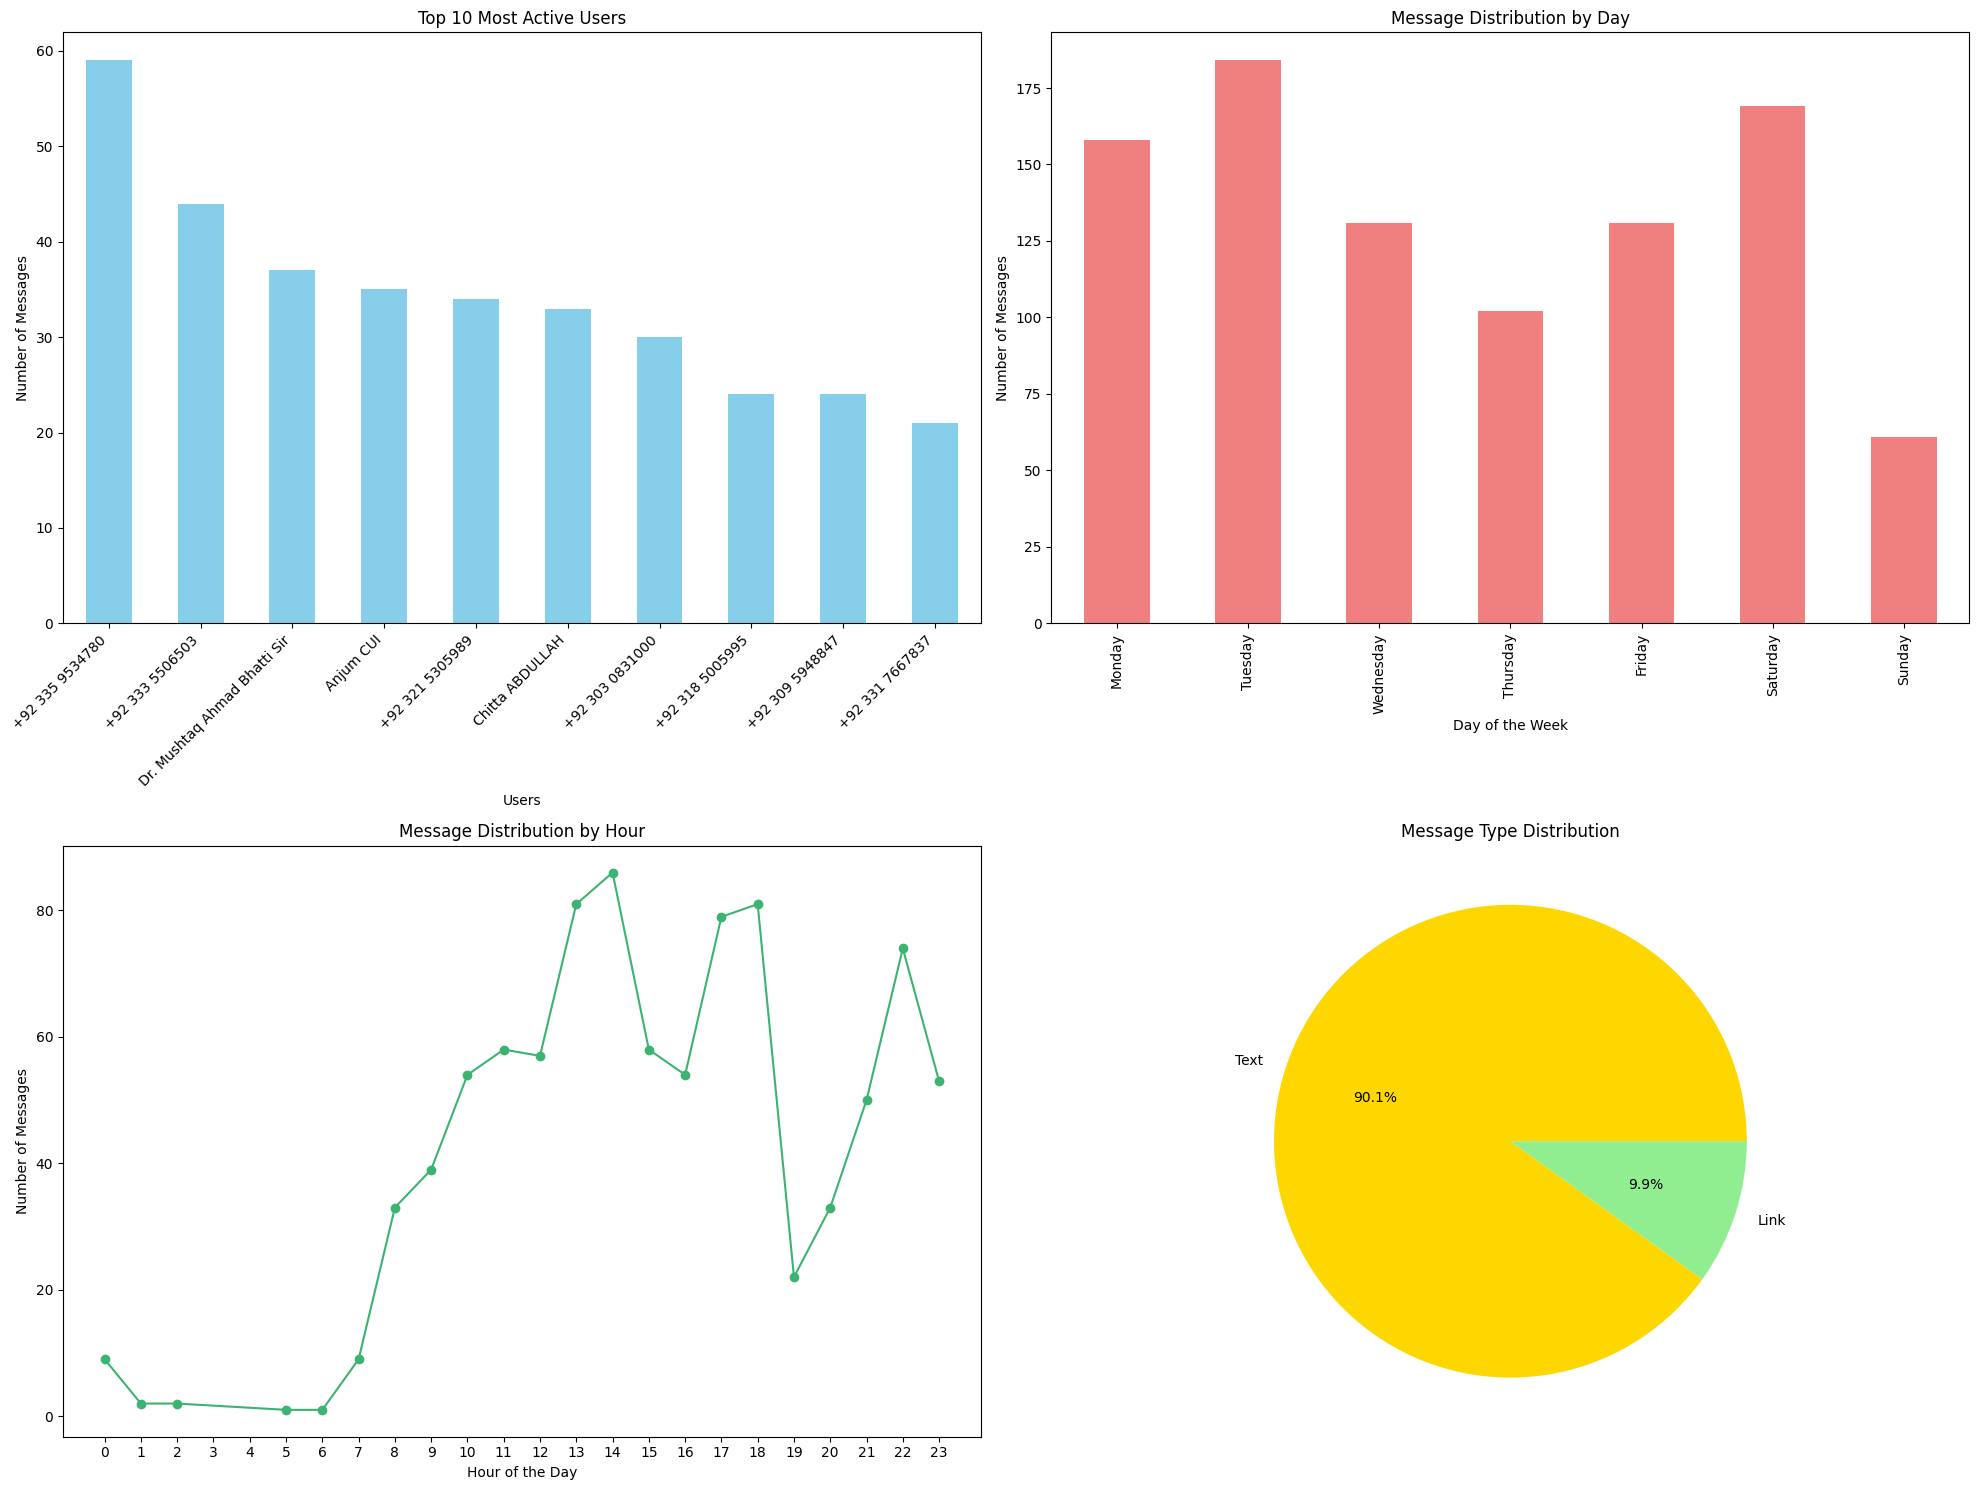

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# Subplot 1: Top 10 Active Users
plt.subplot(2, 2, 1)
top_users = df_whatsapp['Sender'].value_counts().head(10)
top_users.plot(kind='bar', color='skyblue')
plt.xlabel('Users')
plt.ylabel('Number of Messages')
plt.title('Top 10 Most Active Users')
plt.xticks(rotation=45, ha='right')


# Subplot 2: Message Distribution by Day
plt.subplot(2, 2, 2)
day_counts = df_whatsapp['Day'].value_counts()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = day_counts.reindex(day_order)
day_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.title('Message Distribution by Day')


# Subplot 3: Message Distribution by Hour
plt.subplot(2, 2, 3)
hourly_counts = df_whatsapp['Hour'].value_counts().sort_index()
hourly_counts.plot(kind='line', marker='o', color='mediumseagreen')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Message Distribution by Hour')
plt.xticks(range(24))


# Subplot 4: Message Type Distribution
plt.subplot(2, 2, 4)
message_type_counts = df_whatsapp['Message_Type'].value_counts()
message_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightgreen', 'lightblue'])
plt.title('Message Type Distribution')
plt.ylabel('') # Hide the y-label


plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

* **Who is the most active user in the WhatsApp group?**  +92 335 9534780 is the most active user.
* **What is the most active day of the week for the group?** Tuesday is the most active day.
* **What is the most active hour of the day for the group?** 2 PM (Hour 14) is the most active hour.
* **What is the average message length (excluding media)?** The average message length (excluding media) is 54.55 characters.


### 2. Data Analysis Key Findings

* **Most Active Day:** Tuesday has the highest number of messages.
* **Most Active Hour:** 2 PM (Hour 14) has the highest number of messages.
* **Top 10 Active Users:**  The analysis identified the top 10 most active users, with "+92 335 9534780" being the most active.
* **Message Types:**  The majority of messages are text messages and links.  No media messages were detected in the processed dataset.
* **Average Message Length:** The average text message length (excluding media) is 54.55 characters.
* **Data Cleaning:** 7 duplicate rows were removed from the dataset, and various irrelevant rows, such as media omitted messages, system messages (add/remove users), and empty messages, were removed.  The resulting data frame has 936 rows.


### 3. Insights or Next Steps

* **Investigate Peak Activity:** Further analyze the patterns of activity on Tuesdays and at 2 PM to understand the reasons behind these peaks. Are there specific topics or events that trigger increased interaction?
* **User Engagement:** Examine the conversations involving the top active users to see if they are driving conversations or just participating.  Correlation analysis could reveal interesting information.
